In [1]:
#all imports
import numpy as np
import time
import matplotlib.pyplot as plt

from InitData import *
from DecisionTrees import *
from Evaluation import *

## Load data

In [2]:
#load dataset
ratingsData = InitRatingsSubSet(10)
#rename colums
ratingsData = ratingsData.rename(columns={'userId': 'user', 'movieId': 'item'})

Dataset ratings.csv loaded


In [3]:
print(ratingsData['user'].unique().shape)
print(ratingsData.head(5))

(16254,)
    user  item  rating
70     2     1     3.5
71     2    62     0.5
72     2   110     5.0
73     2   150     4.0
74     2   151     4.5


## Evaluation Tree

### Create tree and predictions for parameter range (this step takes time)

In [12]:
#create empty lists
all_predictions = []
all_zeroRatingUsers = []
all_averageSolicitedItems = []
construction_times = []
#set range of parameter you want to research
for mindepth in range(6,16):
    #create copy
    df = ratingsData.copy()
    #split data
    train_set, test_set = splitActiveLearningData(df,0.2)
    #calculate entropy if needed
    train_set = entropyCalculation(train_set)
    print("\tDatasplit performed")
    #build tree
    startTime = time.time()
    #change parameters in tree
    tree = DynamicDecisionTree(train_set,2,mindepth,15,SplitFunction.logPopEntropySplit, IntervalFunction.getIntervals)
    endTime = time.time()
    print("\tTree build "+str(endTime-startTime))
    #evaluate
    predictions, zeroRatingUsers, averageSolicitedItems = predictTreebatch(train_set, test_set, tree, 0)
    print("\tPredictions done")
    all_predictions.append(predictions)
    all_zeroRatingUsers.append(zeroRatingUsers)
    all_averageSolicitedItems.append(averageSolicitedItems)
    construction_times.append(endTime-startTime)

	Datasplit performed
	Tree build 129.19163298606873
	Batch nr 1 started
	Prediction computation time: 77.48199772834778
	Predictions done
	Datasplit performed
	Tree build 165.400315284729
	Batch nr 1 started
	Prediction computation time: 95.73981285095215
	Predictions done
	Datasplit performed
	Tree build 213.78955101966858
	Batch nr 1 started
	Prediction computation time: 84.91989088058472
	Predictions done
	Datasplit performed
	Tree build 226.6425428390503
	Batch nr 1 started
	Prediction computation time: 76.66637992858887
	Predictions done
	Datasplit performed
	Tree build 255.44197916984558
	Batch nr 1 started
	Prediction computation time: 73.93511986732483
	Predictions done
	Datasplit performed
	Tree build 280.05815720558167
	Batch nr 1 started
	Prediction computation time: 71.71697998046875
	Predictions done
	Datasplit performed
	Tree build 299.6199879646301
	Batch nr 1 started
	Prediction computation time: 72.05718564987183
	Predictions done
	Datasplit performed
	Tree build 310.2

### Evaluation graphs

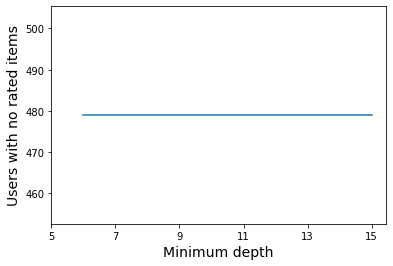

In [13]:
#show zero rating users
#use correct ranges for x_val
x_val = [i for i in range(6,16)]
y_val = [len(i) for i in all_zeroRatingUsers]

plt.plot(x_val,y_val)
plt.xlabel('Minimum depth',fontsize = 14)
plt.ylabel('Users with no rated items',fontsize = 14)
#plt.axhline(y=test_set['user'].unique().shape[0],color='red',label='total new users')
#plt.yticks([2600, 2700, 2800, 2900, 3000, 3100, 3200, 3300])
plt.xticks([5, 7, 9, 11, 13,15])
#plt.legend(loc="lower left")
#plt.savefig('figs/dynamic/zeroG_dynamic.png')
plt.show()

In [14]:
#zero ratings
temp = np.array([len(i) for i in all_zeroRatingUsers])
temp = temp*(-1)+test_set['user'].unique().shape[0]
temp = temp/test_set['user'].unique().shape[0]*100
print(100-np.mean(temp))
print(len(all_zeroRatingUsers[-1])/test_set['user'].unique().shape[0]*100)

14.733928022147026
14.73392802214703


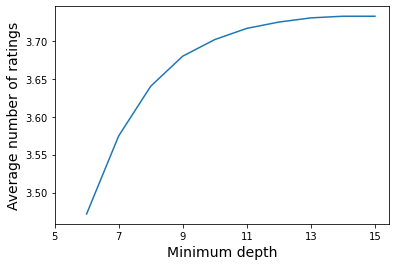

In [17]:
#show avg elicited items
x_val = [i for i in range(6,16)]
y_val = all_averageSolicitedItems

plt.plot(x_val,y_val)
plt.xlabel('Minimum depth',fontsize = 14)
plt.ylabel('Average number of ratings',fontsize = 14)
plt.xticks([5, 7, 9, 11, 13,15])
#plt.savefig('figs/dynamic/avgSol_dynamic.png')
plt.show()

In [18]:
#get the metrics for all predictions
maes = []
rmses = []
mod_maes = []
mod_rmses = []
for i,p in enumerate(all_predictions):
    maes.append(getMAE(p))
    rmses.append(getRMSE(p))
    mod_maes.append(getModifiedMAE(p,test_set,all_zeroRatingUsers[i]))
    mod_rmses.append(getModifiedRMSE(p,test_set,all_zeroRatingUsers[i]))

In [19]:
print(maes)
print(rmses)
print(mod_maes)
print(mod_rmses)

[0.7976441109209857, 0.7940726306675291, 0.7925150066075403, 0.7911720840585337, 0.7914574509241433, 0.7908729855447448, 0.790598056427827, 0.7904495653516265, 0.7903695827637318, 0.7903695827637318]
[1.0382288619364743, 1.03383382688983, 1.0322680673547797, 1.030948489286763, 1.0314246482754235, 1.0305375108280879, 1.0302189143611842, 1.0298630551793029, 1.0297941081208473, 1.0297941081208473]
[0.9254660929499722, 0.9190828155798018, 0.9177052997788262, 0.9165441798633971, 0.9167499690553891, 0.9162573112800553, 0.9158769843641318, 0.9157434040056492, 0.9156762373404518, 0.9156762373404518]
[1.1269090006365716, 1.1208668804465483, 1.1195027136505513, 1.1183705648448454, 1.1187473775135, 1.118000142379382, 1.1176280673631787, 1.117322475316082, 1.1172645470045326, 1.1172645470045326]


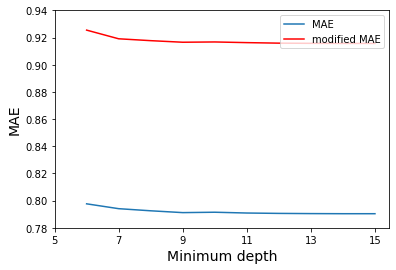

In [20]:
#plot mae
x = [i for i in range(6,16)]
y_1 = maes
y_2 = mod_maes

plt.plot(x,y_1,label='MAE')
plt.plot(x,y_2,color='r',label='modified MAE')
plt.xlabel('Minimum depth',fontsize = 14)
plt.ylabel('MAE',fontsize = 14)
plt.xticks([5, 7, 9, 11, 13,15])
plt.yticks([0.78,0.80,0.82,0.84,0.86,0.88,0.90,0.92,0.94])
plt.legend(loc="upper right")
#plt.savefig('figs/dynamic/MAE_dynamic.png')
plt.show()

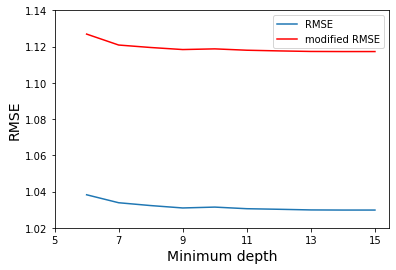

In [21]:
#plot rmse
x = [i for i in range(6,16)]
y_1 = rmses
y_2 = mod_rmses

plt.plot(x,y_1,label='RMSE')
plt.plot(x,y_2,color='r',label='modified RMSE')
plt.xlabel('Minimum depth',fontsize = 14)
plt.ylabel('RMSE',fontsize = 14)
plt.xticks([5, 7, 9, 11, 13,15])
plt.yticks([1.02,1.04,1.06,1.08,1.10,1.12,1.14])
plt.legend(loc="upper right")
#plt.savefig('figs/dynamic/RMSE_dynamic.png')
plt.show()

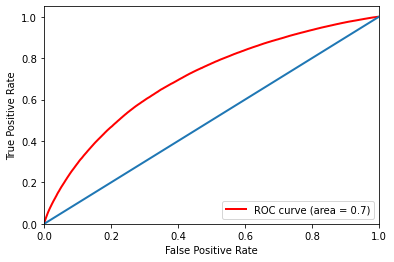

0.7

In [42]:
#get roc for certain tree
getROC(all_predictions[-1], train_set)

[92302 55601 34139]


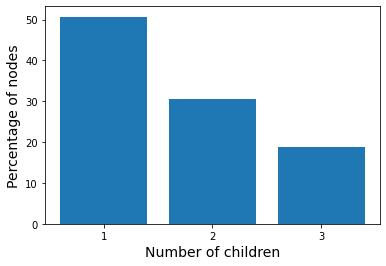

In [33]:
#function for distribution of likes/dislikes/unknown in a tree
def checkChild(node):
    if node == None:
        return 0,0,0
    dislikes,likes,nones=0,0,0
    users = node.users
    if node.chosenInterval != None:
        if 3.5 in node.chosenInterval:
            likes += users
        elif 0.5 in node.chosenInterval:
            dislikes += users
        else:
            nones += users
    for child in node.children:
        triple = checkChild(child)
        nones += triple[0]
        likes += triple[1]
        dislikes += triple[2]
    return nones, likes, dislikes

#shows the distribution of the chosen paths
y = np.array(checkChild(tree.root))
print(y)
x = np.array([1,2,3])
y = y/sum(y)*100

plt.bar(x,y)

plt.xlabel('Number of children',fontsize = 14)
plt.ylabel('Percentage of nodes',fontsize = 14)
plt.xticks([1,2,3])
#plt.yscale('log')
#plt.savefig('figs/extended/child_partitioning.png')
plt.show()

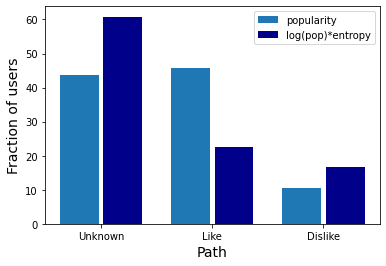

In [37]:
#comparison of path distribution in different trees

#create trees
t1 = DecisionTree(train_set,2,10,SplitFunction.popularSplit, IntervalFunction.getIntervals)
t2 = DecisionTree(train_set,2,10,SplitFunction.logPopEntropySplit, IntervalFunction.getIntervals)

#get distributions
y1 = np.array(checkChild(t1.root))
y1 = y1/np.sum(y1)*100
y2 = np.array(checkChild(t2.root))
y2 = y2/np.sum(y2)*100

x = np.array([0,1,2])
xticks = np.array(['Unknown','Like','Dislike'])
width = 0.35

plt.bar(x,y1,label='popularity',width=width)
plt.bar(x+width+0.04,y2,color='darkblue',label='log(pop)*entropy',width=width)
plt.xlabel('Path',fontsize = 14)
plt.ylabel('Fraction of users',fontsize = 14)
plt.xticks(x+width/2+0.02,xticks)
plt.legend(loc="upper right")
#plt.savefig('figs/baseline/entropy/path_partitioning.png')
plt.show()

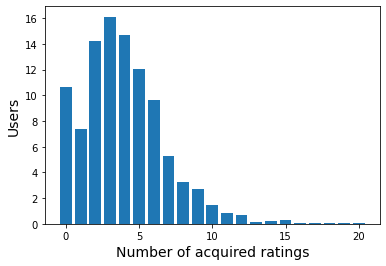

In [55]:
#get number of acquired ratings for a tree
t1 = DecisionTree(train_set,2,20,SplitFunction.logPopEntropySplit, IntervalFunction.getIntervals)

users = test_set['user'].unique()
acquired_ratings = [0 for i in range(21)]
for u in users:
    queried_items = readTree(t1,u,test_set)
    #ratings for asked items of user
    data_user = test_set[test_set['user']==u]
    queried_data = data_user[data_user['item'].isin(queried_items)]
    #store amount of solicited items
    acquired_ratings[(len(queried_data['item'].unique()))] += 1

x = [i for i in range(21)]
y = np.array(acquired_ratings)
y = y/np.sum(y)*100

plt.bar(x,y)
plt.xlabel('Number of acquired ratings',fontsize = 14)
plt.ylabel('Users',fontsize = 14)
#plt.yscale('log')
#plt.savefig('figs/extended/child_partitioning.png')
plt.show()

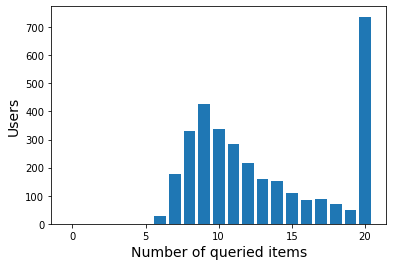

In [56]:
#get number of queried items for a tree
t1 = DynamicDecisionTree(train_set,2,10,20,SplitFunction.logPopEntropySplit, IntervalFunction.getIntervals)

users = test_set['user'].unique()
queries = [0 for i in range(21)]
for u in users:
    queried_items = readTree(t1,u,test_set)
    #store amount of solicited items
    queries[(len(queried_items))] += 1

x = [i for i in range(21)]
y = queries

plt.bar(x,y)
plt.xlabel('Number of queried items',fontsize = 14)
plt.ylabel('Users',fontsize = 14)
#plt.yscale('log')
#plt.savefig('figs/extended/child_partitioning.png')
plt.show()

## Evaluate web of trees

### Extra graphs

In [62]:
#create empty lists
all_predictions = []
all_zeroRatingUsers = []
all_averageSolicitedItems = []
construction_times = []
params = []

#set range of parameter you want to research
for maxdepth in range(5,10):
    for mindepth in range(5,10):
        #create copy
        df = ratingsData.copy()
        #split data
        train_set, test_set = splitActiveLearningData(df,0.2)
        #calculate entropy if needed
        train_set = entropyCalculation(train_set)
        print("\tDatasplit performed")
        #build tree
        startTime = time.time()
        #change parameters in tree
        wot = WebOfTrees(train_set, 2, 7, 15, 
                mindepth, maxdepth,
                SplitFunction.logPopEntropySplit, IntervalFunction.getIntervals, dfSplits=15)
        
        endTime = time.time()
        print("\tWeb build "+str(endTime-startTime))
        #evaluate
        predictions, zeroRatingUsers, averageSolicitedItems = predictWebbatch(train_set, test_set, wot, 0)
        print("\tPredictions done")
        all_predictions.append(predictions)
        all_zeroRatingUsers.append(zeroRatingUsers)
        all_averageSolicitedItems.append(averageSolicitedItems)
        construction_times.append(endTime-startTime)
        params.append((mindepth,maxdepth))

	Datasplit performed
	Web build 71.93706607818604
	Batch nr 1 started
	Prediction computation time: 92.95188403129578
	Predictions done
	Datasplit performed
	Web build 69.86144471168518
	Batch nr 1 started
	Prediction computation time: 88.7580897808075
	Predictions done
	Datasplit performed
	Web build 65.55456399917603
	Batch nr 1 started
	Prediction computation time: 77.71122312545776
	Predictions done
	Datasplit performed
	Web build 65.37127780914307
	Batch nr 1 started
	Prediction computation time: 84.11190390586853
	Predictions done
	Datasplit performed
	Web build 66.95690393447876
	Batch nr 1 started
	Prediction computation time: 85.14576387405396
	Predictions done
	Datasplit performed
	Web build 109.49591398239136
	Batch nr 1 started
	Prediction computation time: 79.25137615203857
	Predictions done
	Datasplit performed
	Web build 109.52765798568726
	Batch nr 1 started
	Prediction computation time: 79.6789870262146
	Predictions done
	Datasplit performed
	Web build 109.909183979034

In [63]:
#get the metrics for all predictions
maes = []
rmses = []
mod_maes = []
mod_rmses = []
for i,p in enumerate(all_predictions):
    maes.append(getMAE(p))
    rmses.append(getRMSE(p))
    mod_maes.append(getModifiedMAE(p,test_set,all_zeroRatingUsers[i]))
    mod_rmses.append(getModifiedRMSE(p,test_set,all_zeroRatingUsers[i]))

In [ ]:
#plot mae vals
x = [i[0] for i in params]
y = [i[1] for i in params]

colors = mod_maes
#transform sizes to be more distinguishable
sizes = np.array(mod_maes)
sizes = (sizes+1)**5*100

plt.scatter(x,y,c=colors, s=sizes, cmap='viridis')
plt.xlabel('Minimal depth')
plt.ylabel('Maximum depth')
cbar = plt.colorbar()
cbar.set_label('Results')
#plt.savefig('figs/wot/mae')
plt.show()